# 此專案針對鐵達尼號資料集為例，進行資料前處理
導入使用套件


In [ ]:
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager
from sklearn.preprocessing import LabelEncoder
!pip install wget
import wget
wget.download('https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf')

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=79cd6274f6a69b83e707af30813b60c217549afb6e58f004a2a55ac373aeee80
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

解壓縮鐵達尼號資料集
* 資料來源 : https://www.kaggle.com/competitions/titanic/data
* 個人雲端備份 : https://drive.google.com/file/d/1i8ZTK58OyqaYuJmYjTP8DpS5woXq17yI/view?usp=sharing

In [ ]:
zip_path = "/content/titanic.zip"
!unzip {zip_path}

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


載入並確認資料集
* 訓練資料集

In [ ]:
train_data = pd.read_csv("/content/train.csv")
train_data.shape  # 共891筆，12個自變數
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* 測試資料集

In [ ]:
test_data = pd.read_csv("/content/test.csv")
test_data.shape  # 共418筆，11個自變數。與訓練集相比，少了「是否存活」這個變數
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


檢視測試資料中是否有錯誤資料
* 自變數數值異常，例如 : 年齡-5歲等

In [ ]:
train_data.describe()
# 查看訓練資料集中無錯誤資料

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_data.describe()
# 查看測試集資料中無錯誤資料

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


檢視資料有哪些自變數有遺漏值

In [ ]:
train_data.isna().sum()
# age(年齡):177筆 cabin(船艙號):687筆 embarked(港口):2筆

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_data.isna().sum()
# age(年齡):86 cabin(船艙號):327 embarked(港口):327筆

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

資料垂直合併，確認資料是否有重複

In [ ]:
all_data = pd.concat([train_data, test_data], axis=0)  # axis=0是指垂直合併
print(len(all_data["Name"]))  # 檢視資料總數:1309
print(len(set(all_data["Name"])))  # 檢視無重複資料數:1307
# 有2筆疑似重複資料

1309
1307


透過乘客姓名找出重複資料

In [ ]:
name_list = []
duplicate_list = []
for i in list(all_data["Name"]):
  if i not in name_list:
    name_list.append(i)
  else:
    duplicate_list.append(i)
duplicate_list

['Kelly, Mr. James', 'Connolly, Miss. Kate']

確認資料是否真的重複

In [ ]:
all_data[(all_data["Name"]=="Kelly, Mr. James")|(all_data["Name"]=="Connolly, Miss. Kate")]
# 透過年齡、船票號及票價推斷，應該只是同姓名但不同人

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
6,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


確認無重複資料後開始補缺失資料
* 年齡 : 263筆
* 票價 : 1筆
* 渡口 : 2筆
* 船艙號 : 1014筆


In [ ]:
all_data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

從年齡開始補(補平均數)

In [ ]:
age_mean = all_data["Age"].mean()
all_data["Age"] = all_data["Age"].fillna(age_mean)  # 用age_mean補缺失值
all_data["Age"].isna().sum()  # 確保有成功補上

0

補票價(補中位數)

In [ ]:
median_fare = all_data["Fare"].median()
all_data["Fare"] = all_data["Fare"].fillna(median_fare)  # 用中位數補缺失值
all_data["Fare"].isna().sum()  # 確保有成功補上

0

補渡口(補類別)

In [ ]:
category_embark = list(set([str(i) for i in all_data["Embarked"] if pd.notnull(i)]))  # 先確認類別資料有哪些選項
category_embark  # 渡口有C, S, Q三個可選
all_data["Embarked"] = all_data["Embarked"].fillna(rd.choice(category_embark))  # 三個渡口隨機選擇一個補上
all_data["Embarked"].isna().sum()  # 確保有成功補上

0

補船艙號(無法補，棄用)

In [ ]:
# 先確認有幾筆缺失值
all_data["Cabin"].isna().sum()  # 1014筆缺失值
all_data["Cabin"]  # 從船艙號中找不到規則可循，且無法透過平均數、中位數或類別來補，因此棄用變數

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

再次確認是否已經補完資料，有遺漏值的應該只有「是否存活」和「船艙號」

In [ ]:
na_var = list(all_data.columns[all_data.isna().any()])
na_var  # 確認無誤

['Survived', 'Cabin']

補完資料後，將標籤資料轉類別

In [ ]:
labelencoder = LabelEncoder()
# 性別標籤轉類別，男生->0 女生->1
all_data.iloc[:, 4] = labelencoder.fit_transform(all_data.iloc[:, 4].values)
# 港口標籤轉類別，C->0 Q->1 S->2
all_data.iloc[:, 11] = labelencoder.fit_transform(all_data.iloc[:, 11].values)
print(all_data['Sex'].unique())
print(all_data['Embarked'].unique())

[1 0]
[2 0 1]


<ipython-input-24-7f1c880d1354>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  all_data.iloc[:, 4] = labelencoder.fit_transform(all_data.iloc[:, 4].values)
<ipython-input-24-7f1c880d1354>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  all_data.iloc[:, 11] = labelencoder.fit_transform(all_data.iloc[:, 11].values)


接著來看一下是否有離群值

In [ ]:
all_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.644003,29.881138,0.498854,0.385027,33.281086,1.491979
std,378.020061,0.486592,0.837836,0.478997,12.883193,1.041658,0.865560,51.741500,0.814230
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,655.000000,0.000000,3.000000,1.000000,29.881138,0.000000,0.000000,14.454200,2.000000
75%,982.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,2.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000


SibSp : 在船上的兄弟姐妹/配偶數量
Parch : 在船上的父母/子女數量
這兩個變數都是整數型態且差距較大，檢查一下

In [ ]:
all_data[all_data["SibSp"] == 8 ]  # 隨然一共有9筆，但這代表1個人有8個兄弟姊妹，且大家都在船上
# 推測SibSp=8不是離群值

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",1,29.881138,8,2,CA. 2343,69.55,NaN,2
180,181,0.0,3,"Sage, Miss. Constance Gladys",0,29.881138,8,2,CA. 2343,69.55,NaN,2
201,202,0.0,3,"Sage, Mr. Frederick",1,29.881138,8,2,CA. 2343,69.55,NaN,2
324,325,0.0,3,"Sage, Mr. George John Jr",1,29.881138,8,2,CA. 2343,69.55,NaN,2
792,793,0.0,3,"Sage, Miss. Stella Anna",0,29.881138,8,2,CA. 2343,69.55,NaN,2
846,847,0.0,3,"Sage, Mr. Douglas Bullen",1,29.881138,8,2,CA. 2343,69.55,NaN,2
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,29.881138,8,2,CA. 2343,69.55,NaN,2
188,1080,NaN,3,"Sage, Miss. Ada",0,29.881138,8,2,CA. 2343,69.55,NaN,2
360,1252,NaN,3,"Sage, Master. William Henry",1,14.500000,8,2,CA. 2343,69.55,NaN,2


In [ ]:
all_data[all_data["Parch"] == 9 ]  # 透過可能冠夫姓來推測是一對夫妻，且子女Sage也都在船上
# 綜合以上兩個結果，推論Sage家族全部都在船上一同出遊
# 認為不是離群值或錯誤資料

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
342,1234,NaN,3,"Sage, Mr. John George",1,29.881138,1,9,CA. 2343,69.55,NaN,2
365,1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",0,29.881138,1,9,CA. 2343,69.55,NaN,2


票價的差距也很大，確認有沒有離群值或是錯誤資料

In [ ]:
all_data[all_data["Fare"] == 512.3292 ]  # 買最高票價的有4位
# 認為沒有離群值或錯誤資料的問題

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1.0,1,"Ward, Miss. Anna",0,35.0,0,0,PC 17755,512.3292,NaN,0
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,PC 17755,512.3292,B51 B53 B55,0
737,738,1.0,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,PC 17755,512.3292,B101,0
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",0,58.0,0,1,PC 17755,512.3292,B51 B53 B55,0


# 資料特徵工程

將SibSp和Parch整併為一個變數「Family_nums」: 在船上的家庭成員數

In [ ]:
all_data["Family_nums"] = all_data["SibSp"] + all_data["Parch"]
all_data.drop(["SibSp", "Parch", "Cabin"], axis=1, inplace=True)  # 將合併完的自變數刪掉節省空間(可不刪除)
all_data["Family_nums"].describe()

count    1309.000000
mean        0.883881
std         1.583639
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Family_nums, dtype: float64

用年齡來分成4組

In [ ]:
age_class = []
for i in all_data["Age"]:
  if i < 18:
    age_class.append(0)
  elif i <= 39:
    age_class.append(1)
  elif i <= 64:
    age_class.append(2)
  else:
    age_class.append(3)
all_data["Age_group"] = age_class

處理完變數後，繪製長方圖來看看年齡分布


In [ ]:
class_1 = age_class.count(0)  # 154
class_2 = age_class.count(1)  # 910
class_3 = age_class.count(2)  # 232
class_4 = age_class.count(3)  # 13
print(class_1, class_2, class_3, class_4)

154 910 232 13


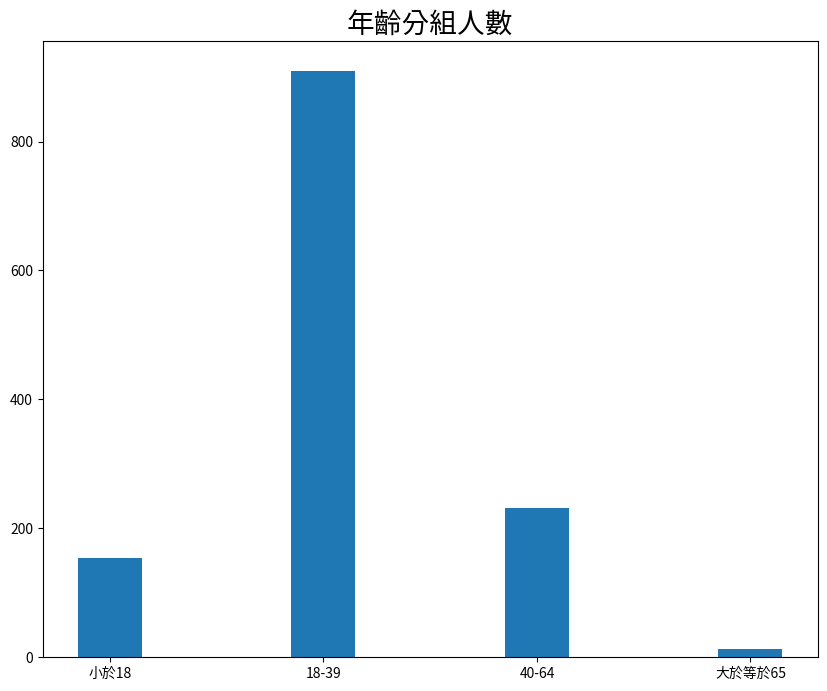

In [ ]:
fontManager.addfont('ChineseFont.ttf')
mpl.rc('font',family='ChineseFont')
# 欄位設定
group = [class_1, class_2, class_3, class_4]
# 設定中文標籤
labels = ['小於18', '18-39', '40-64', '大於等於65']
# 製圖-設定
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10, 8)
ax1.bar(labels, group, width=0.3)
ax1.set_title('年齡分組人數', size = 20)
plt.show()

資料清理 - 重新定義all_data(整併資料)index


In [ ]:
all_data = all_data.reset_index()

# 圓餅圖

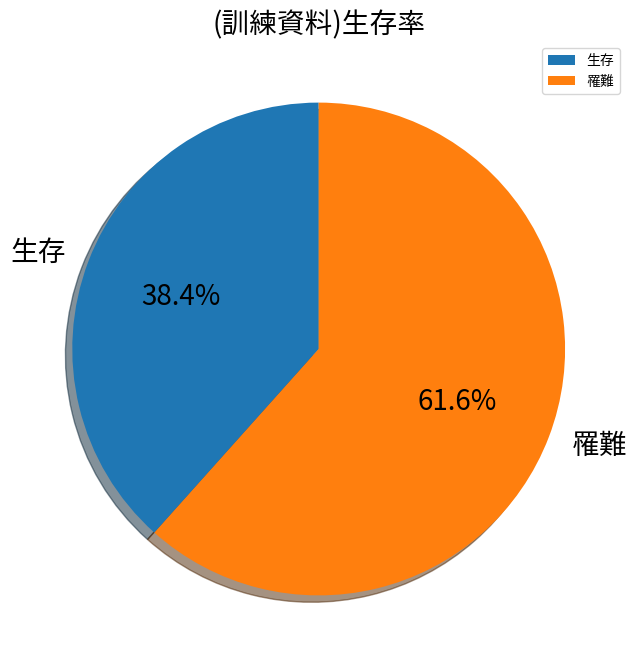

In [ ]:
# 設定條件-撈出存活的人
alive = len((all_data[all_data['Survived'] == 1.00]))
die = len((all_data[all_data['Survived'] == 0.00]))
# 定義標籤與數值
ls = ['生存', '罹難']
data = [alive, die]

# 設定圖表
fig1, ax1 = plt.subplots()  # 初始化
ax1.pie(data, labels=ls, autopct='%.1f%%', shadow=True, startangle=90, textprops={'fontsize': 20})  # 百分比 影子 角度 字體大小
ax1.set_title("(訓練資料)生存率", size = 20)
ax1.legend()  # 標籤增加到圖裡面
fig1.set_size_inches(10, 8)
plt.show()

分層分析

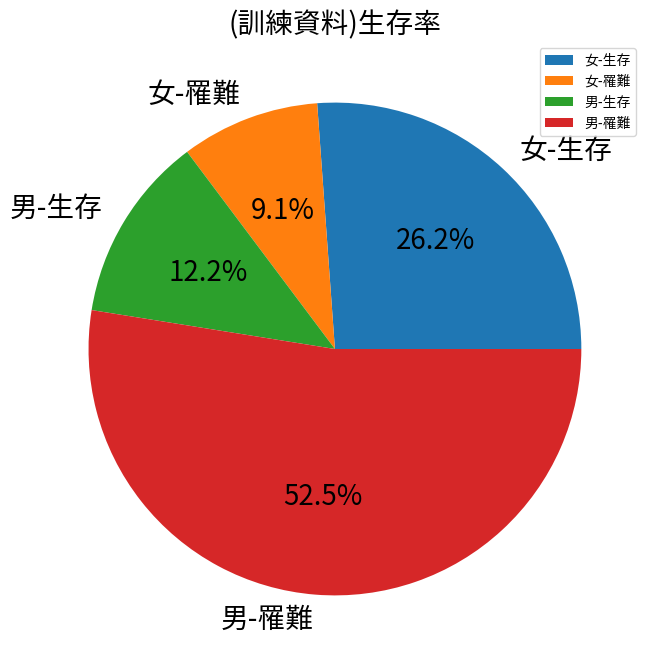

In [ ]:
# 分層分析
f_alive = len(all_data[(all_data['Survived'] == 1.0) & (all_data['Sex']== 0)]) # 女性存活人數(存活資料筆數)
f_die = len(all_data[(all_data['Survived'] == 0.0) & (all_data['Sex']== 0)]) # 女性罹難人數(存活資料筆數)
m_alive = len(all_data[(all_data['Survived'] == 1.0) & (all_data['Sex']== 1)]) # 男性存活人數(存活資料筆數)
m_die = len(all_data[(all_data['Survived'] == 0.0) & (all_data['Sex']== 1)]) # 男性罹難人數(存活資料筆數)
# 圓餅圖
ls = ['女-生存', '女-罹難', '男-生存', '男-罹難']
data = [f_alive, f_die, m_alive, m_die]
#設定圖表
fig1, ax1 = plt.subplots() #初始畫圖表
ax1.pie(data, labels=ls, autopct='%.1f%%', textprops={'fontsize': 20})
ax1.set_title("(訓練資料)生存率", size = 20)
ax1.legend() # 增加圖例
fig1.set_size_inches(10, 8)
plt.show()

In [ ]:
print(all_data.isnull().sum())

index            0
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
Ticket           0
Fare             0
Embarked         0
Family_nums      0
Age_group        0
dtype: int64


# 散佈圖

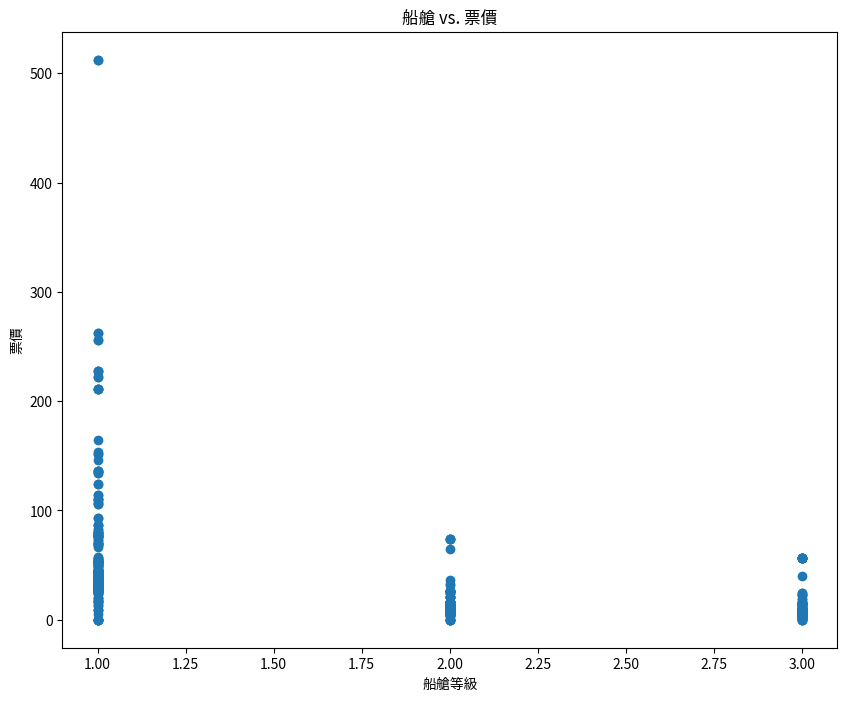

In [ ]:
# 找船艙跟票價關係
data_x = all_data['Pclass']
data_y = all_data['Fare'] / (all_data['Family_nums'] + 1)  # 考量到票價可能是整個家族一起購買的，所以平分下去

fig1, ax1 = plt.subplots()
ax1.scatter(data_x, data_y)
ax1.set_xlabel('船艙等級')
ax1.set_ylabel('票價')
ax1.set_title('船艙 vs. 票價')
fig1.set_size_inches(10, 8)
plt.show()

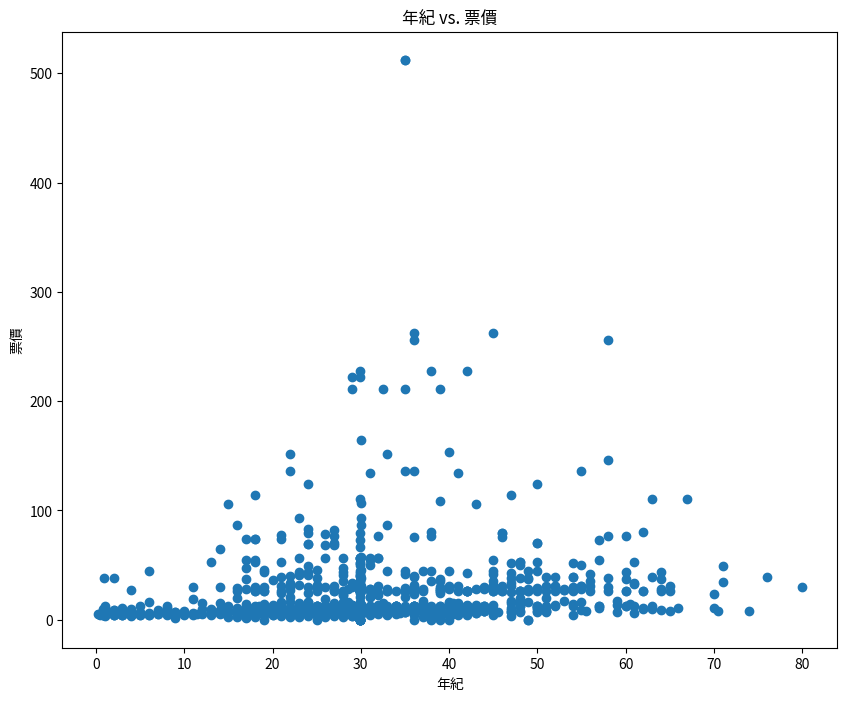

In [ ]:
# 年紀與票價關係
data_x = all_data['Age']
data_y = all_data['Fare'] / (all_data['Family_nums'] + 1)

fig1, ax1 = plt.subplots()
ax1.scatter(data_x, data_y)
ax1.set_xlabel('年紀')
ax1.set_ylabel('票價')
ax1.set_title('年紀 vs. 票價')
fig1.set_size_inches(10, 8)
plt.show()

儲存處理完的檔案

In [ ]:
all_data.to_csv('/content/all_data.csv', index=False)

In [ ]:
all_data.to_csv('/content/drive/MyDrive/Colab Notebooks/專案/已完成/鐵達尼資料處理/all_data.csv', index=False)